In [8]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data=pd.read_csv("/content/drive/MyDrive/ian/heart_cleveland_upload.csv")

In [4]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [6]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [7]:
data=data.replace(np.nan,0)

In [9]:
# check missing values in variables

data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [10]:
X = data.drop(['condition'], axis=1)  # drop condition column and include all other condition
y = data['condition'] #  only rad is included #iloc ,x(rad,age)

In [11]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0


In [12]:
y

,condition
0,0
1,0
2,0
3,1
4,0
...,...
292,1
293,1
294,1
295,0


In [13]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [15]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [16]:
dtc=DecisionTreeClassifier(criterion='gini',random_state=0)

In [17]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [18]:
y_pred=dtc.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score

print('Model accuracy score of dtc: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score of dtc: 0.7071


In [20]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix of dtc\n\n', cm)

Confusion matrix of dtc

 [[36 20]
 [ 9 34]]


In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.64      0.71        56
           1       0.63      0.79      0.70        43

    accuracy                           0.71        99
   macro avg       0.71      0.72      0.71        99
weighted avg       0.73      0.71      0.71        99



AUC: 0.72


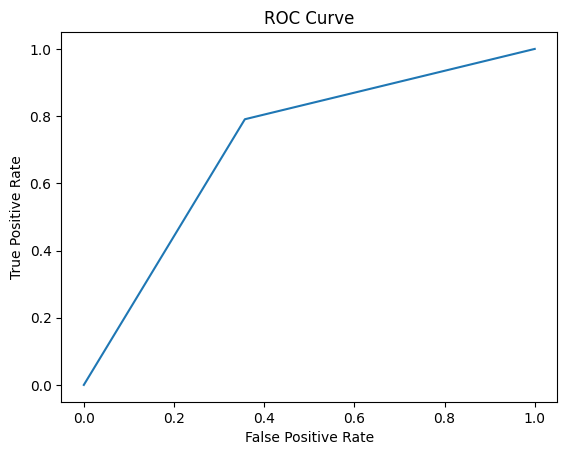

In [22]:
# Calculate the ROC Precision, Recall, and F1-Score
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_fscore_support
import matplotlib.pyplot as plt
# Calculate the AUC
auc = roc_auc_score(y_test, y_pred.round())
print('AUC: %.2f' % auc)

# Calculate the ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred.round())


# plot the roc curve
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [24]:
y_pred = rfc.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

print('Model accuracy score of rfc: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score of rfc: 0.7778


In [26]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix of dtc\n\n', cm)

Confusion matrix of dtc

 [[43 13]
 [ 9 34]]


In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        56
           1       0.72      0.79      0.76        43

    accuracy                           0.78        99
   macro avg       0.78      0.78      0.78        99
weighted avg       0.78      0.78      0.78        99



AUC: 0.78


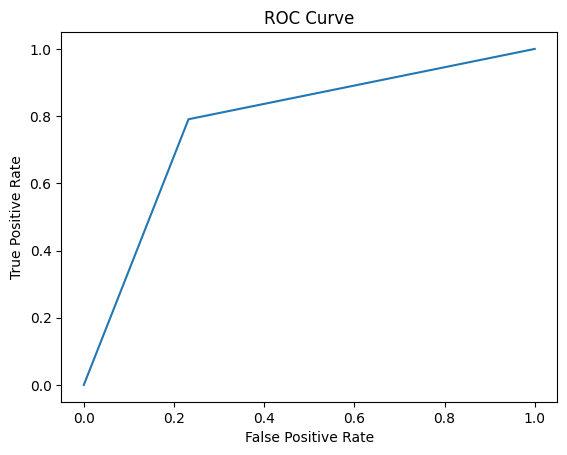

In [28]:
#calculate the ROC Precision, Recall, and F1-Score
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_fscore_support
import matplotlib.pyplot as plt
# Calculate the AUC
auc = roc_auc_score(y_test, y_pred.round())
print('AUC: %.2f' % auc)

# Calculate the ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred.round())


# plot the roc curve
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

SVM

In [29]:
import numpy as np
import pandas as pd

In [30]:
data=pd.read_csv("/content/drive/MyDrive/ian/heart_cleveland_upload.csv")

In [31]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [32]:
X = data.drop(['ca'], axis=1)  # drop outcome column and include all other column
y = data['ca'] #  only outcome is included #iloc ,x(outcone,age)

In [33]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)

SVC()

In [36]:
y_pred=svm.predict(X_test)

In [37]:
svm=SVC(kernel="linear")

In [38]:
from sklearn.metrics import accuracy_score

print('Model accuracy score of dtc: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score of dtc: 0.6869


LOGISTIC REGRESSION


In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
LR=LogisticRegression()

In [41]:
LR.fit(X_train,y_train)

LogisticRegression()

In [42]:
LR.predict(X_test)

array([1, 1, 0, 0, 0, 0, 2, 3, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 3, 3, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 1, 0, 1, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [43]:
y_pred=LR.predict(X_test)

In [44]:
LR=SVC(kernel="linear")

In [45]:
from sklearn.metrics import accuracy_score

print('Model accuracy score of dtc: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score of dtc: 0.6263


In [46]:
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
GBC=GradientBoostingClassifier()

In [48]:
GBC.fit(X_train,y_train)

GradientBoostingClassifier()

In [49]:
GBC.predict(X_test)

array([0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 0, 3, 0,
       0, 0, 0, 1, 1, 3, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       2, 1, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 2,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [50]:
y_pred=GBC.predict(X_test)

In [51]:
GBC=SVC(kernel="linear")

In [52]:
from sklearn.metrics import accuracy_score

print('Model accuracy score of dtc: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score of dtc: 0.6162


In [53]:
from sklearn.ensemble import AdaBoostClassifier

In [54]:
abc=AdaBoostClassifier()

In [55]:
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [56]:
abc.predict(X_test)

array([3, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 3, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 2, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [57]:
y_pred=abc.predict(X_test)

In [58]:
abc=SVC(kernel="linear")

In [59]:
from sklearn.metrics import accuracy_score

print('Model accuracy score of dtc: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score of dtc: 0.6768


LINEAR REGRESSION

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
LR=LinearRegression()

In [62]:
LR.fit(X_train,y_train)

LinearRegression()

In [63]:
y_pred=LR.predict(X_test)

In [64]:
LR=SVC(kernel="linear")

In [65]:
y_binary=[1 if pred>=0.5 else 0 for pred in y_pred]

In [66]:
from sklearn.metrics import accuracy_score

print('Model accuracy score of lr: {0:0.4f}'. format(accuracy_score(y_test, y_binary)))

Model accuracy score of lr: 0.6061


KNeighbors Classifiers

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
KN=KNeighborsClassifier(n_neighbors=8)

In [69]:
KN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [70]:
KN.predict(X_test)

array([0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 3, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [71]:
y_pred=KN.predict(X_test)

In [72]:
KN.predict(X_test,)

array([0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 3, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [73]:
y_pred=KN.predict(X_test)

In [74]:
KN=SVC(kernel="linear")

In [75]:
from sklearn.metrics import accuracy_score

print('Model accuracy score of lr: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score of lr: 0.6263


NAIVE BAYES

In [76]:
from sklearn.naive_bayes import GaussianNB

In [77]:
NB=GaussianNB()

In [78]:
NB.fit(X_train,y_train)

GaussianNB()

In [79]:
NB.predict(X_test)

array([3, 1, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 3, 0, 1, 0,
       0, 0, 0, 1, 3, 3, 0, 3, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 3, 0, 0, 3, 0, 1, 0, 2, 0, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0,
       0, 2, 1, 1, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 2,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [80]:
y_pred=NB.predict(X_test)

In [81]:
y_pred=NB.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score

print('Model accuracy score of lr: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score of lr: 0.5960


PICKLE

In [83]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import pickle
import matplotlib.pyplot as plt
from itertools import cycle

In [89]:
# Load the dataset from Google Drive
data = pd.read_csv('/content/drive/MyDrive/ian/heart_cleveland_upload.csv')

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
# Prepare the data
X = data[['age','sex','cp','ca','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','thal','condition']]
y = data['condition']

In [96]:
# Encode the target variable
y_encoded, y_classes = pd.factorize(y)

# Binarize the output for multi-class ROC AUC
n_classes = len(y_classes)
y_bin = label_binarize(y_encoded, classes=range(n_classes))

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [97]:
# Save the model using pickle
with open('iris_forecasting_model.pkl', 'wb') as file:
    pickle.dump(rfc, file)


In [101]:
# Evaluate the model
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

y_classes_str=y_classes.astype(str).tolist()
classification_metrics = classification_report(y_test, y_pred, target_names=y_classes_str)
print("Classification Report:\n", classification_metrics)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)



Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        28

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Confusion Matrix:
 [[32  0]
 [ 0 28]]
